This jupyter notebook provides the code stumps for the exam questions.

In [1]:
!pip install pandas matplotlib seaborn lets_plot geopandas
import pandas as pd
import seaborn as sns #seaborn is a Python data visualization library based on matplotlib
%pip install lets-plot
from lets_plot import * #Lets_Plot is a plotting library for statistical data which is implemented in Kotlin and can be used in Python
LetsPlot.setup_html()
from lets_plot import tilesets 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 23.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 41.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 5.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 1.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
try:
  from pulp import *
except:
  !pip install pulp
  from pulp import *

try:
  from lets_plot import *
except:
  !pip install lets_plot
  from lets_plot import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 29.8 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


## Question 1: Profit Optimization for Hotel Room Sales

In [3]:
#Demand function
def demand(p):
    demand_value = 1000 - 2.2 * p

    return int(demand_value)

In [4]:
#Revenue function
def revenue(p):
    rooms_booked = demand(p) * p
    total_revenue = rooms_booked * p
    return total_revenue

In [5]:
#Total cost function
def total_cost(p):
    rooms_booked = demand(p)

    if rooms_booked <=60:
        cost=rooms_booked*50
    elif rooms_booked>60 and rooms_booked<=150:
        cost=rooms_booked*40
    elif rooms_booked>150:
        cost=rooms_booked*30
    
    if demand(p)>100:
        extra_cost=20000

    total_cost=cost+extra_cost

    return total_cost
    


In [ ]:
#Profit function
def profit(p):
    return revenue(p) - total_cost(p)

## Question 2: Hotel Reservation Management

In [28]:
#Single reservation handling 
reservation={'rooms':9,
             'adr': 0.9,
             'id':1}


hotel={'rooms_available':100,
       'adr_threshold':0.3,
       'bookings': []}



In [29]:
def process_reservation(hotel, reservation):
    if reservation['adr'] >= hotel['adr_threshold']:
        if hotel['rooms_available'] >= reservation['rooms']:
            hotel['bookings'].append(reservation)
            hotel['rooms_available'] = hotel['rooms_available']-reservation['rooms']
        else:
            print('Booking not accepted')
    return hotel


In [30]:
process_reservation(hotel, reservation)

{'rooms_available': 91,
 'adr_threshold': 0.3,
 'bookings': [{'rooms': 9, 'adr': 0.9, 'id': 1}]}

In [31]:
#Multiple reservations handling
reservation=[{'rooms':9,'adr': 0.9,'id':1},
             {'rooms':2,'adr': 0.7,'id':2},
             {'rooms':3,'adr': 0.8,'id':3},
             {'rooms':4,'adr': 0.7,'id':4},
             {'rooms':5,'adr': 0.6,'id':5}]


hotel={'rooms_available':100,
       'adr_threshold':0.3,
       'bookings': []}


In [33]:
def process_reservation(hotel, reservation):
    for p in reservation:
        if p['adr'] >= hotel['adr_threshold']:
            if hotel['rooms_available'] >= p['rooms']:
                hotel['bookings'].append(p)
                hotel['rooms_available'] = hotel['rooms_available']-p['rooms']
            else:
                print('Booking not accepted')
    return hotel

In [34]:
process_reservation(hotel, reservation)

{'rooms_available': 77,
 'adr_threshold': 0.3,
 'bookings': [{'rooms': 9, 'adr': 0.9, 'id': 1},
  {'rooms': 2, 'adr': 0.7, 'id': 2},
  {'rooms': 3, 'adr': 0.8, 'id': 3},
  {'rooms': 4, 'adr': 0.7, 'id': 4},
  {'rooms': 5, 'adr': 0.6, 'id': 5}]}

## Question 3

The dataset is provided in the `data.csv` file.

In [40]:
#Load the data
data=pd.read_csv('data.csv')
data.head(50)

,date,adr,room_type,num_rooms,location,month
0,2023-01-01,157,single,3,Copenhagen,1
1,2023-01-01,474,suite,1,Copenhagen,1
2,2023-01-01,442,suite,1,New York,1
3,2023-01-01,141,single,3,Copenhagen,1
4,2023-01-01,200,single,3,New York,1
5,2023-01-01,256,double,3,New York,1
6,2023-01-01,316,double,1,New York,1
7,2023-01-01,236,double,2,New York,1
8,2023-01-01,234,double,5,Copenhagen,1
9,2023-01-01,438,suite,2,Copenhagen,1


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       7300 non-null   object
 1   adr        7300 non-null   int64 
 2   room_type  7300 non-null   object
 3   num_rooms  7300 non-null   int64 
 4   location   7300 non-null   object
 5   month      7300 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 342.3+ KB


In [39]:
data.describe()

,adr,num_rooms,month
count,7300.000000,7300.000000,7300.000000
mean,240.867945,2.996575,6.526027
std,119.865884,1.415613,3.448088
min,44.000000,1.000000,1.000000
25%,148.000000,2.000000,4.000000
50%,222.000000,3.000000,7.000000
75%,310.000000,4.000000,10.000000
max,716.000000,5.000000,12.000000


In [41]:
data['room_type'].value_counts()

room_type
single    3599
double    2414
suite     1287
Name: count, dtype: int64

In [42]:
data['location'].value_counts()

location
New York      3612
Copenhagen    2185
Berlin        1503
Name: count, dtype: int64

In [47]:
#Monthly booking trends
data['date'] = pd.to_datetime(data['date'])
data['month']=data['date'].dt.month
data['year']=data['date'].dt.year
monthly_trends=data.groupby(['year','month'])[['num_rooms']].sum()
monthly_trends


num_rooms
year month           
2023 1           1785
     2           1654
     3           1879
     4           1824
     5           1849
     6           1817
     7           1833
     8           1895
     9           1826
     10          1891
     11          1755
     12          1867

<Axes: xlabel='month', ylabel='num_rooms'>

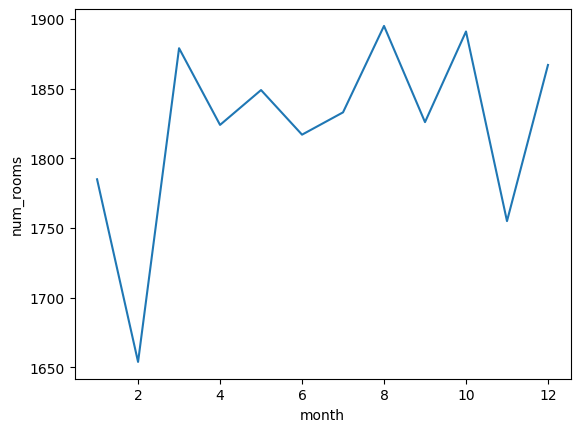

In [48]:
sns.lineplot(data=monthly_trends, x='month', y='num_rooms')

In [56]:
data.groupby(['location', 'room_type'])[['adr','num_rooms']].agg(['mean','median','sum','min','max',])




adr                          num_rooms         \
                            mean median     sum  min  max      mean median   
location   room_type                                                         
Berlin     double     169.601449  168.0   46810   87  282  2.876812    3.0   
           single     100.313488  100.0  107837   44  172  3.049302    3.0   
           suite      305.447368  299.0   46428  173  458  3.085526    3.0   
Copenhagen double     222.253968  215.0  154022  115  374  3.033189    3.0   
           single     152.466229  146.0  162529   76  246  3.000000    3.0   
           suite      376.708920  371.5  160478  202  619  2.960094    3.0   
New York   double     303.606228  296.0  438711  161  479  3.004844    3.0   
           single     225.054870  222.0  328130  122  356  2.972565    3.0   
           suite      442.018336  428.0  313391  244  716  2.957687    3.0   

                                    
                       sum min max  
location   room_type                
Berlin     double      794   1   5  
           single     3278   1   5  
           suite       469   1   5  
Copenhagen double     2102   1   5  
           single     3198   1   5  
           suite      1261   1   5  
New York   double     4342   1   5  
           single     4334   1   5  
           suite      2097   1   5

In [64]:

def demand(location, room_type, adr):
    filtered_data=data[(data['location']==location) & (data['room_type']==room_type) & (data['adr']>= adr)]
    total_num_rooms=filtered_data['num_rooms'].sum()
    return total_num_rooms


In [67]:
demand('New York', 'single', 100)

np.int64(4334)

In [74]:
adr_range = range(50, 601)

demand_data = []

locations = data['location'].unique()
room_types = data['room_type'].unique()

for location in locations:
    for room_type in room_types:
        for adr in adr_range:
            rooms_booked = demand(location, room_type, adr)
            demand_data.append({
                'location': location,
                'room_type': room_type,
                'adr': adr,
                'rooms_booked': rooms_booked
            })

demand_data = pd.DataFrame(demand_data)


In [79]:
demand_data

,location,room_type,adr,rooms_booked
0,Copenhagen,single,50,3198
1,Copenhagen,single,51,3198
2,Copenhagen,single,52,3198
3,Copenhagen,single,53,3198
4,Copenhagen,single,54,3198
...,...,...,...,...
4954,Berlin,double,596,0
4955,Berlin,double,597,0
4956,Berlin,double,598,0
4957,Berlin,double,599,0


<Axes: xlabel='adr', ylabel='num_rooms'>

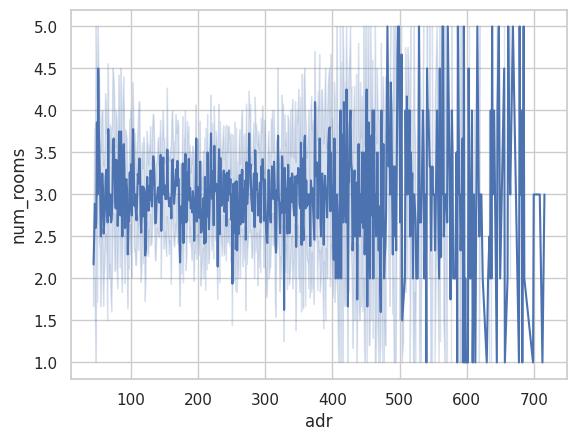

In [90]:
sns.lineplot(data=data, x='adr', y='num_rooms')


In [96]:
ggplot(data=data) + geom_bar(aes(x='adr',y='num_rooms',color= 'room_type')) + facet_wrap("location")

## Question 4

The code for this question is not meant to be run and is therefore only included as an image.

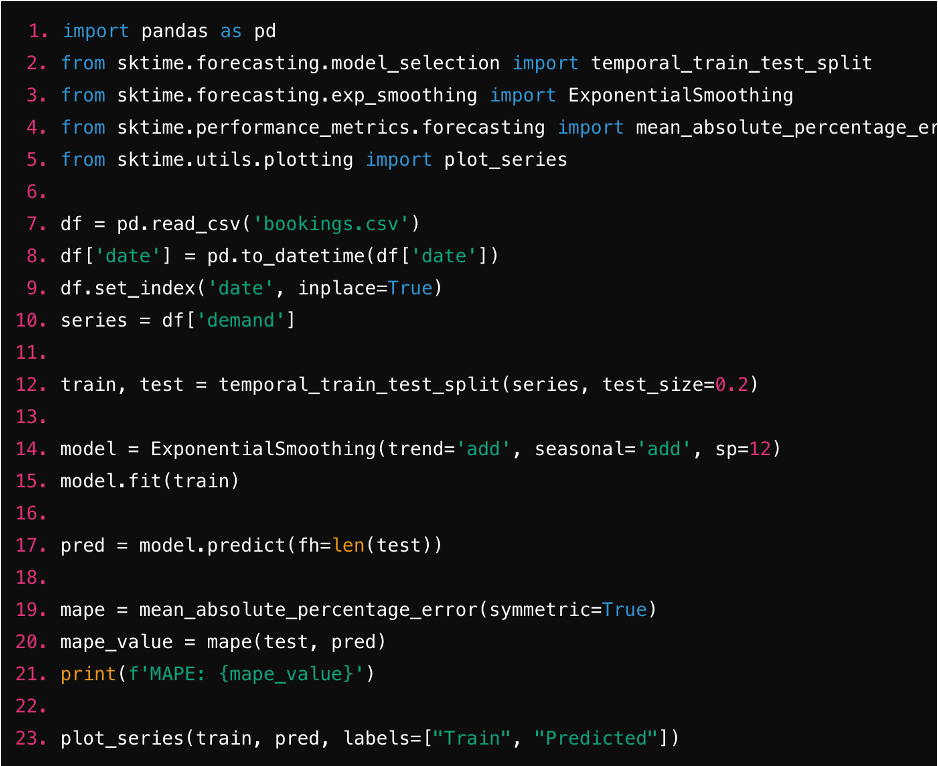

#9:set the column "date" as the index of the data set, so that the data set is ordered by the date to perform time series forecasting.
 The argument of "inplace=True" means the modification of the original data set, not creating a new data set.

#12: split the target variable which is series of "demand" column into the training and testing set by temporal order. 20% of the data as the testing data.

#14:Use the time series forcasting method exponential smoothing as a forcasting model, adding trend and seasonal components. The sesonal period is 12 months in a year. 

#15: fit the model on the training data

#17:use the fitted model to make a prediction with a time horizon as the length of test dataset,meaning that predictions will be made for the same number of periods as there are in the test set.

#19,20: Use the evaluation method of mean absolute percentate error to assess the accuracy between prediction and actual data ( which is testing data)

#23: Plot the actual training data and prediction data to see the forcasting gap.

#b.
TimeSeriesForecasting= Trend + Sesonality + Cycle + Random 
Time series forecasting is only based on the series data itself, only considering 4 components showed on the formulation above. It can't be considered the external variables.

Limitations: It can't predict very precisely if the scenario is dynamic with some unexpectedly external things. For example, events occurred near the hotel is not fixed, it's a random factor externally. If in one year, these events always occur, which lead to fluctuate in the demand, then time series forecasting not very well, maybe big gap emerges.

#C.
To shying away from the limitation of time series, we can use machine learning alternatively, such as random forest, using the package of Scikit-learn, to add external features.

Feature engineersing:

Calculate rolling mean value over specific windows such as 7 days to capture trends.

Extract "month" from the date to account for seasonality.

## Question 5

In [97]:
try:
  from pulp import *
except:
  !pip install pulp
  from pulp import *

import numpy as np


# Example data
treatments = ['Basic Massage', 'Aromatherapy', 'Deep Tissue Massage']
price_range = np.arange(10, 101, 10)  # Pricing levels
a_values = {'Basic Massage': 1500, 'Aromatherapy': 2000, 'Deep Tissue Massage': 1600}
b_values = {'Basic Massage': 1.5, 'Aromatherapy': 1.2, 'Deep Tissue Massage': 1.3}
resource_usage_per_unit = {'Basic Massage': 1, 'Aromatherapy': 2, 'Deep Tissue Massage': 3}
total_resource_capacity = 50 # Total resource capacity (e.g., hours available from specialists)

demand = {}
for treatment in treatments:
    demand[treatment] = {}
    for p in price_range:
        demand[treatment][p] = max(a_values[treatment] * p**(-b_values[treatment]), 0)

prob = LpProblem("Spa_Treatment_Profit_Maximization", LpMaximize)

price_vars = {}
for treatment in treatments:
  price_vars[treatment] = LpVariable.dicts(treatment+"price", price_range, cat='Binary') #

prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * price for treatment in treatments for price in price_range)

# Constraint Block 1
for treatment in treatments:
    prob += lpSum(price_vars[treatment][price] for price in price_range) == 1

# Constraint Block 2
prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * resource_usage_per_unit[treatment]
                   for treatment in treatments for price in price_range) <= total_resource_capacity

# Solve the problem
prob.solve(PULP_CBC_CMD(msg=False))


1

a.
The demand is based on the different price level .
Price level is considered within the range between 10 and 110, the step is 10.
In the demand function, there is power operation and max function, which can't be applied to the linear programming directly, as they are non-linear operation.


b.
Decision Variables: price_vars[treatment] and demand[treatment][price].
price_vars[treatment] indicating if one price in the price range is chosen. If it's chosen, then 1, if not, then 0.

Objective Function: lpSum(price_vars[treatment][price] * demand[treatment][price] * price for treatment in treatments for price in price_range)，
sum of the revenue at the price chosen of each treatment and its corresponding demand

Constraints: 
lpSum(price_vars[treatment][price] for price in price_range) == 1，each treatment only choses one price
lpSum(price_vars[treatment][price] * demand[treatment][price] * resource_usage_per_unit[treatment] for treatment in treatments for price in price_range) <= total_resource_capacity, All of the resource of treatments used can't exceed the maximum capacity which is 50
